## SimplyUnet Implementation Guidance

This is a step-by-step guidance of how to implement the SimplyUnet model to generate multispectral images from the RGB image. You can either run the manually run the code below or run the script with the single command line.

In [1]:
!pip install -r requirements.txt -q
print("Installation completed.")


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Installation completed.


### ✔ Run with a single command line

In [2]:
# !python train.py --trainpath  '../train/' --valpath '../val/' -lr 0.02 -e 100

#### ✍ Run manually by explicitly listing settings 

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from train_wanb import train_test_model, VGGFeatureExtractor, gen_img
from utils.data import load_datasets
from model import SimplyUNet
import warnings
import torch

# torch.cuda.manual_seed(42) #Fixed seed for the reproductability
warnings.filterwarnings("ignore")

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Feel free to explore other variations of models in the 'unets' directory.
model = SimplyUNet()
vgg_feature_extractor = VGGFeatureExtractor()

# Define paths and hyperparameters
train_path =  '../train/' 
val_path = '../val/'

Using device: cuda


In [5]:
learning_rate = 0.02
epochs = 10

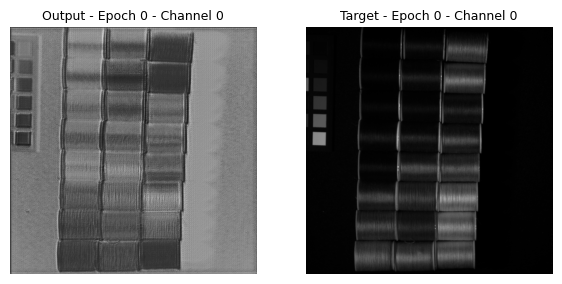

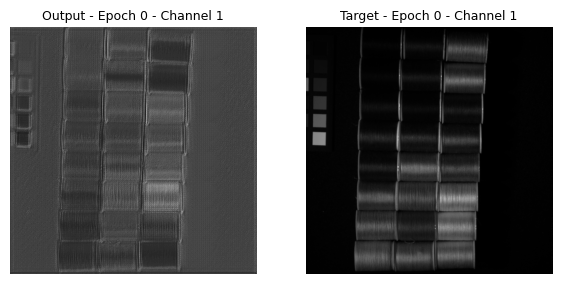

Best model saved with Validation LPIPS: 2.2758
Epoch [1/10] Train PSNR: 47.1130, Val PSNR: 22.7911, Train LPIPS: 3.3883, Val LPIPS: 2.2758, Train SSIM: 0.2283, Val SSIM: 0.0179
Epoch [2/10] Train PSNR: 47.1167, Val PSNR: 22.8369, Train LPIPS: 3.2943, Val LPIPS: 2.2767, Train SSIM: 0.2474, Val SSIM: 0.1030
Best model saved with Validation LPIPS: 2.2753
Epoch [3/10] Train PSNR: 47.1216, Val PSNR: 22.8692, Train LPIPS: 3.3007, Val LPIPS: 2.2753, Train SSIM: 0.2605, Val SSIM: 0.1316


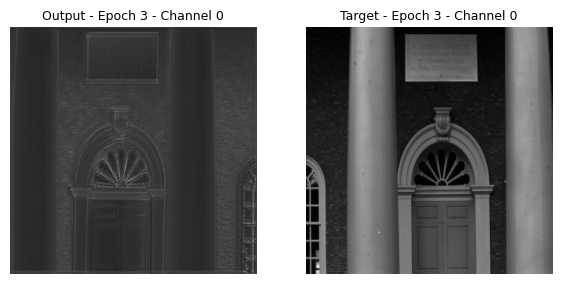

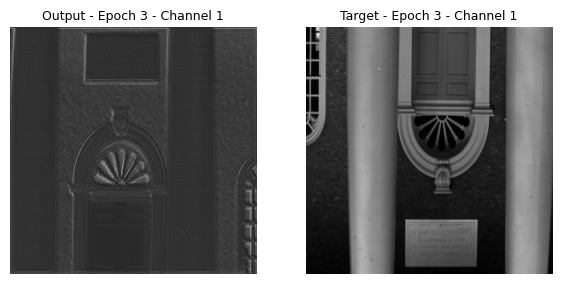

Best model saved with Validation LPIPS: 2.2744
Epoch [4/10] Train PSNR: 47.1217, Val PSNR: 22.8739, Train LPIPS: 3.2178, Val LPIPS: 2.2744, Train SSIM: 0.2786, Val SSIM: 0.1535
Best model saved with Validation LPIPS: 2.2741
Epoch [5/10] Train PSNR: 47.1204, Val PSNR: 22.8746, Train LPIPS: 3.3197, Val LPIPS: 2.2741, Train SSIM: 0.2859, Val SSIM: 0.1542
Best model saved with Validation LPIPS: 2.2738
Epoch [6/10] Train PSNR: 47.1217, Val PSNR: 22.8744, Train LPIPS: 3.2431, Val LPIPS: 2.2738, Train SSIM: 0.2780, Val SSIM: 0.1631


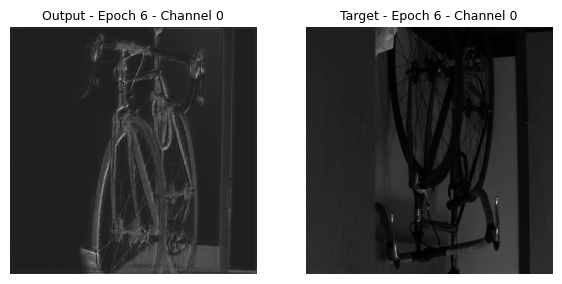

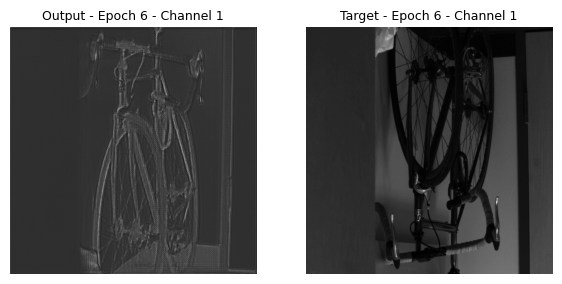

Best model saved with Validation LPIPS: 2.2737
Epoch [7/10] Train PSNR: 47.1178, Val PSNR: 22.8746, Train LPIPS: 3.2021, Val LPIPS: 2.2737, Train SSIM: 0.2495, Val SSIM: 0.1607
Epoch [8/10] Train PSNR: 47.1221, Val PSNR: 22.8743, Train LPIPS: 3.4211, Val LPIPS: 2.2738, Train SSIM: 0.2566, Val SSIM: 0.1600
Best model saved with Validation LPIPS: 2.2737
Epoch [9/10] Train PSNR: 47.1180, Val PSNR: 22.8744, Train LPIPS: 3.3356, Val LPIPS: 2.2737, Train SSIM: 0.2715, Val SSIM: 0.1595


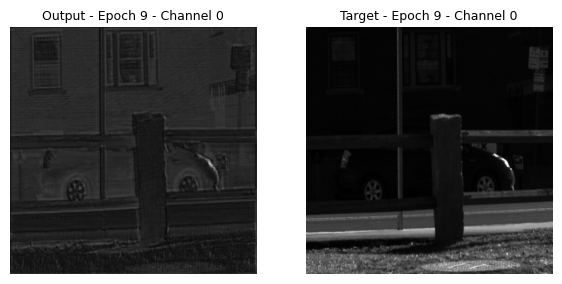

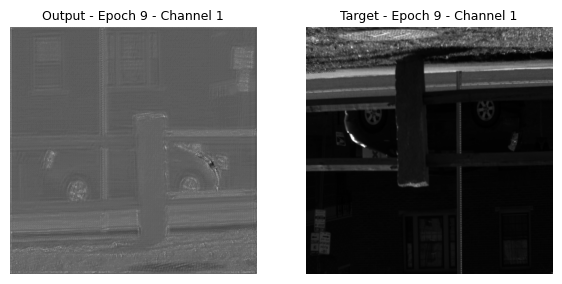

Epoch [10/10] Train PSNR: 47.1183, Val PSNR: 22.8742, Train LPIPS: 3.3537, Val LPIPS: 2.2738, Train SSIM: 0.2751, Val SSIM: 0.1565
Train/Test completed


In [4]:
model = SimplyUNet()
vgg_feature_extractor = VGGFeatureExtractor()
optimizer = optim.SGD(model.parameters(), lr=learning_rate,momentum=0.8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
train_test_model(model,train_path,val_path, optimizer, scheduler,device, epochs)

#### 👉 Load saved model from best_model directory

In [ ]:
#Choose suitable best model path from the directory
#Example
best_model_path = './best_model/best_model_1_0.0046.pth'
model = SimplyUNet()
test_path = '../../val/rgb_images' #Due to lack of datsaet, use val_path temporarily
output_dir = './saved_output'
gen_img(model, best_model_path, test_path, output_dir, device)

### Extract the Hidden Painting

In [ ]:
from extract.extract import SiameseNetwork
from extract.train_extract import train
from extract.data import load_datasets

In [ ]:
model = SiameseNetwork().to(device)
learning_rate = 0.02
optimizer = optim.SGD(model.parameters(), lr=learning_rate,momentum=0.8)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

if device == 'cuda':
    torch.cuda.empty_cache()

# trainpath='../../train/'
# valpath ='../../val/'
batch = 16
epochs = 5 #Demonstrative purpose

train_loader, val_loader = load_datasets(trainpath, valpath,batch)
train(model, device, train_loader, val_loader, optimizer, epochs)
print('Train/Validation completed')